In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition and initialization of variables and parameters 

In [2]:
N = 200

D = 0.2
drag = 2
gaussian_mean = 0
gaussian_std = np.sqrt(2*D)

time_step = 0.01
N_steps = 5000

# Euler implementation

In [3]:
def Euler(dt, eta, Nt, N_trajectories):
    X_0 = np.zeros((N_trajectories, Nt))
    X_0[:, 0] = 1
    t = np.zeros(Nt)
    X = X_0
    for i in range(1, Nt):
        t[i] = t[i - 1] + dt
        xi = np.random.normal(loc = gaussian_mean, scale = gaussian_std, size = N_trajectories)
        X[:, i] = X[:, i - 1] - dt * (1/eta*(X[:, i - 1]**3 - X[:, i - 1] + 1) + xi)
    return X, t

X, t = Euler(time_step, drag, N_steps, N_trajectories = 200)

# Single, mean trajectory and variance plots

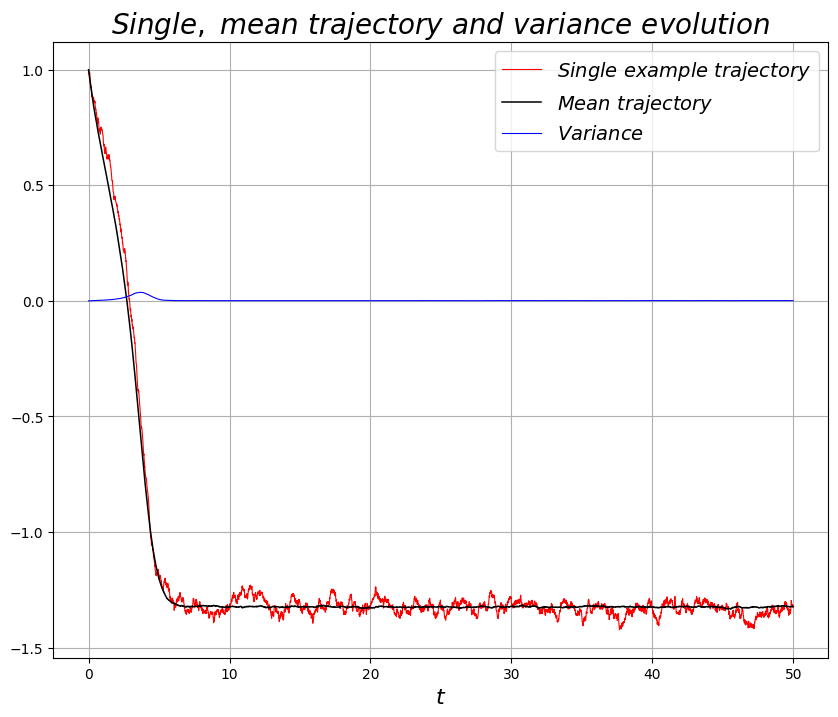

In [4]:
X_mean = np.mean(X, axis = 0)
X_var = np.var(X, axis = 0)

fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(t, X[0, :], 'r', linewidth = 0.8, label = '$Single\ example\ trajectory$')
ax.plot(t, X_mean, 'k', linewidth = 1.1,label = '$Mean \ trajectory$')
ax.plot(t, X_var, 'b', linewidth = 0.8, label = '$Variance$')
ax.set_xlabel('$t$', fontsize = 16)
ax.set_title('$Single,\ mean\ trajectory\ and\ variance\ evolution$', fontsize = 20)
ax.legend(fontsize = 14)

plt.grid()
fig.tight_layout
plt.show()

# Variance plot

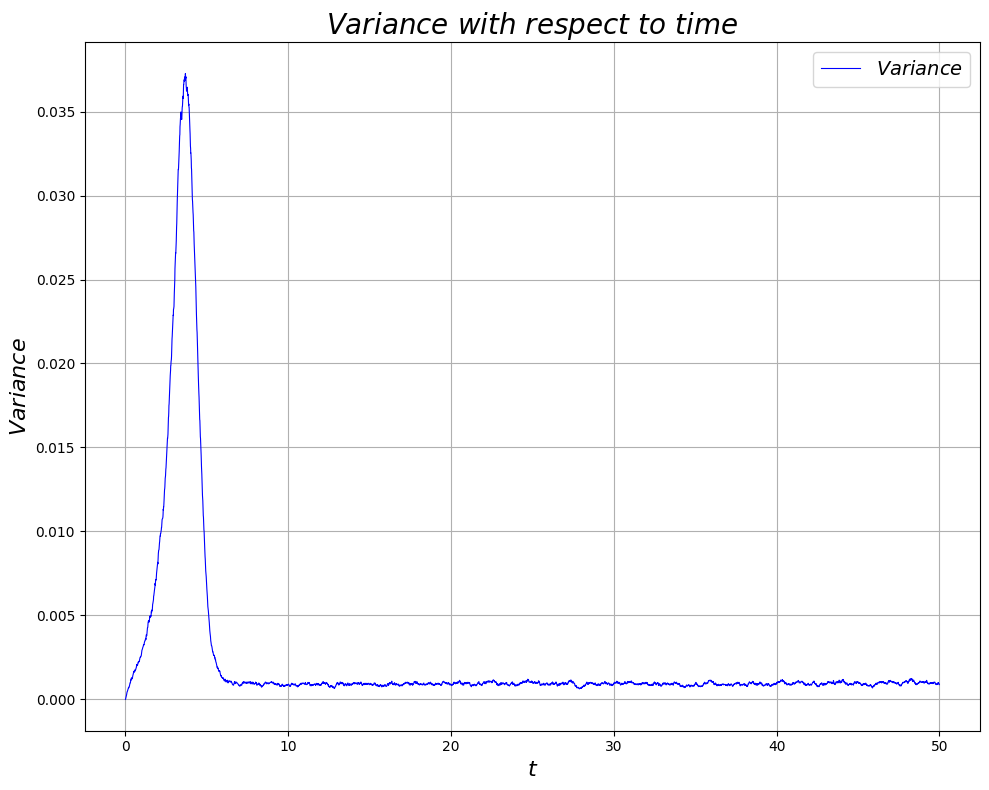

In [5]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(t, X_var, 'b', linewidth = 0.8, label = '$Variance$')
ax.set_xlabel('$t$', fontsize = 16)
ax.set_ylabel('$Variance$', fontsize = 16)
ax.set_title('$Variance\ with \ respect\ to\ time$', fontsize = 20)
ax.legend(fontsize = 14)

plt.grid()
fig.tight_layout()
plt.show()